<a href="https://colab.research.google.com/github/OvoFiona/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CUSTOMER SEGMENTATION IN MACHINE LEARNING  **

In [1]:
#Importing libraries and loading the dataset
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset from the uploaded CSV file
print("Please upload the 'Mall_Customers.csv' file:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)


Please upload the 'mall_customers.csv' file:


Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
#Displaying basic information about the dataset
print("="*50)
print("BASIC DATASET INFORMATION")
print("="*50)
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nFirst 5 rows:")
print(df.head())

BASIC DATASET INFORMATION
Dataset shape: (200, 5)
Number of rows: 200
Number of columns: 5

Column names:
['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Data types:
CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

First 5 rows:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


DATA CLEANING

MISSING VALUES CHECK
                        Missing Values  Percentage
CustomerID                           0         0.0
Genre                                0         0.0
Age                                  0         0.0
Annual Income (k$)                   0         0.0
Spending Score (1-100)               0         0.0


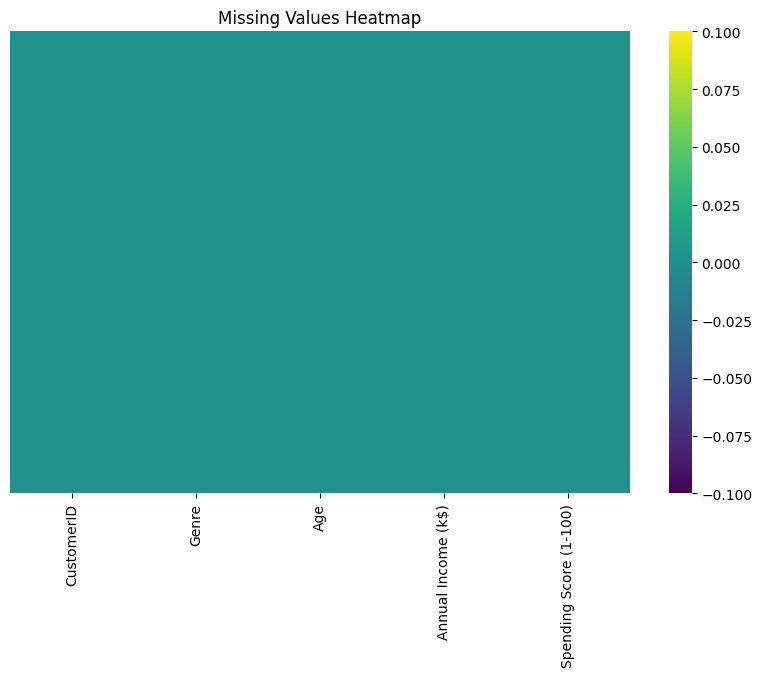

In [3]:
#Check for missing values
print("="*50)
print("MISSING VALUES CHECK")
print("="*50)
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_df)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [4]:
#Check for duplicate rows
print("="*50)
print("DUPLICATE ROWS CHECK")
print("="*50)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for duplicate CustomerIDs
duplicate_ids = df['CustomerID'].duplicated().sum()
print(f"Number of duplicate CustomerIDs: {duplicate_ids}")

# If duplicates exist, remove them
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")

DUPLICATE ROWS CHECK
Number of duplicate rows: 0
Number of duplicate CustomerIDs: 0


In [5]:
#Data Type Validation and Correction
print("="*50)
print("DATA TYPE VALIDATION")
print("="*50)

# Check current data types
print("Current data types:")
print(df.dtypes)

# Convert CustomerID to string/object type (it's an identifier, not a number)
df['CustomerID'] = df['CustomerID'].astype(str).str.zfill(4)  # Ensure 4-digit format

# Ensure Gender is categorical
df['Genre'] = df['Genre'].astype('category')

# Ensure Age is integer
df['Age'] = df['Age'].astype(int)

# Ensure Annual Income is integer
df['Annual Income (k$)'] = df['Annual Income (k$)'].astype(int)

# Ensure Spending Score is integer
df['Spending Score (1-100)'] = df['Spending Score (1-100)'].astype(int)

print("\nUpdated data types:")
print(df.dtypes)

DATA TYPE VALIDATION
Current data types:
CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Updated data types:
CustomerID                  object
Genre                     category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object


OUTLIER DETECTION

Age:
  Lower bound: -1.62
  Upper bound: 79.38
  Number of outliers: 0

Annual Income (k$):
  Lower bound: -13.25
  Upper bound: 132.75
  Number of outliers: 2
  Outlier values: [np.int64(137)]

Spending Score (1-100):
  Lower bound: -22.62
  Upper bound: 130.38
  Number of outliers: 0


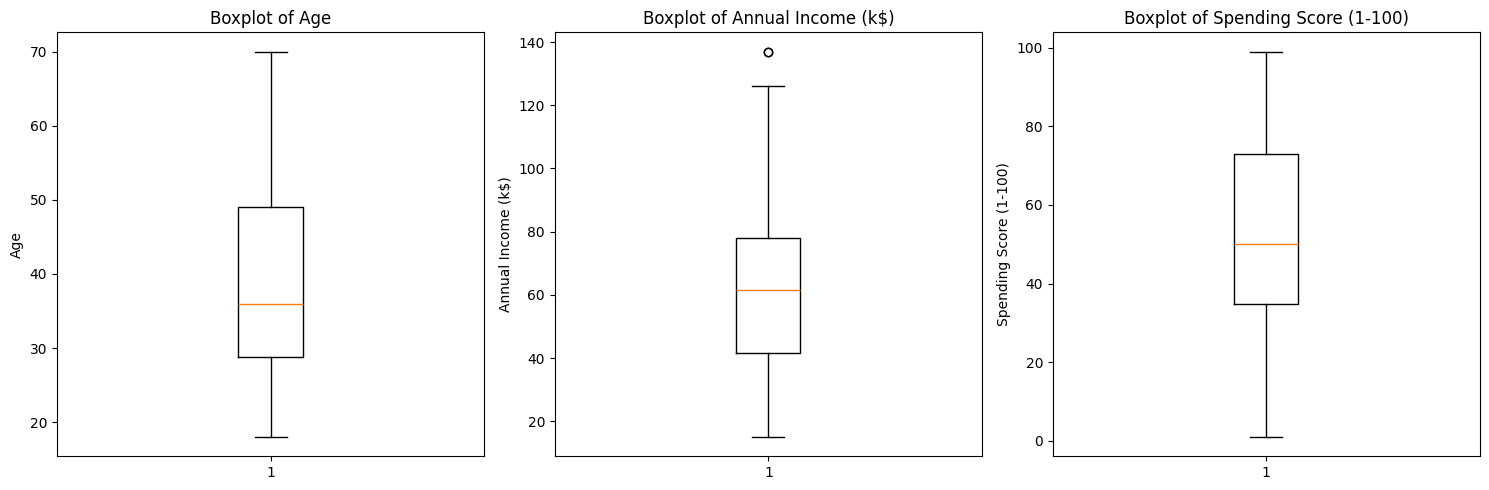

In [6]:
#Check for Outliers
print("="*50)
print("OUTLIER DETECTION")
print("="*50)

# Select numerical columns for outlier detection
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Using IQR method to detect outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\n{col}:")
    print(f"  Lower bound: {lower_bound:.2f}")
    print(f"  Upper bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)}")

    if len(outliers) > 0:
        print(f"  Outlier values: {sorted(outliers[col].unique())}")

# Visualize outliers using box plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()

In [7]:
#Check Value Ranges and Validity
print("="*50)
print("VALUE RANGE VALIDATION")
print("="*50)

# Check Age range
print(f"Age - Min: {df['Age'].min()}, Max: {df['Age'].max()}, Mean: {df['Age'].mean():.2f}")

# Check Annual Income range
print(f"Annual Income - Min: {df['Annual Income (k$)'].min()}, Max: {df['Annual Income (k$)'].max()}, Mean: {df['Annual Income (k$)'].mean():.2f}")

# Check Spending Score range
print(f"Spending Score - Min: {df['Spending Score (1-100)'].min()}, Max: {df['Spending Score (1-100)'].max()}, Mean: {df['Spending Score (1-100)'].mean():.2f}")

# Validate Spending Score is within 1-100
invalid_scores = df[(df['Spending Score (1-100)'] < 1) | (df['Spending Score (1-100)'] > 100)]
if len(invalid_scores) > 0:
    print(f"\nWARNING: Found {len(invalid_scores)} records with Spending Score outside 1-100 range")
    print(invalid_scores[['CustomerID', 'Spending Score (1-100)']])

VALUE RANGE VALIDATION
Age - Min: 18, Max: 70, Mean: 38.85
Annual Income - Min: 15, Max: 137, Mean: 60.56
Spending Score - Min: 1, Max: 99, Mean: 50.20


In [8]:
#Check Gender Distribution
print("="*50)
print("GENDER DISTRIBUTION")
print("="*50)

gender_counts = df['Genre'].value_counts()
gender_percentage = df['Genre'].value_counts(normalize=True) * 100

gender_df = pd.DataFrame({
    'Count': gender_counts,
    'Percentage': gender_percentage
})
print(gender_df)

# Check for any invalid gender values
valid_genders = ['Male', 'Female']
invalid_genders = df[~df['Genre'].isin(valid_genders)]
if len(invalid_genders) > 0:
    print(f"\nWARNING: Found {len(invalid_genders)} records with invalid gender values")
    print(invalid_genders[['CustomerID', 'Genre']])

GENDER DISTRIBUTION
        Count  Percentage
Genre                    
Female    112        56.0
Male       88        44.0


STATISTICAL SUMMARY

Numerical columns summary:
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000

Summary by Gender:
          Age                                                       \
        count       mean        std   min    25%   50%   75%   max   
Genre                                                                
Female  112.0  38.098214  12.644095  18.0  29.00  35.0  47.5  68.0   
Male     88.0  39.806818  15.514812  18.0  27.75  37.0  50.5  70.0   

       Annual Income (k

/tmp/ipython-input-3348476165.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Genre')[numerical_cols].describe())


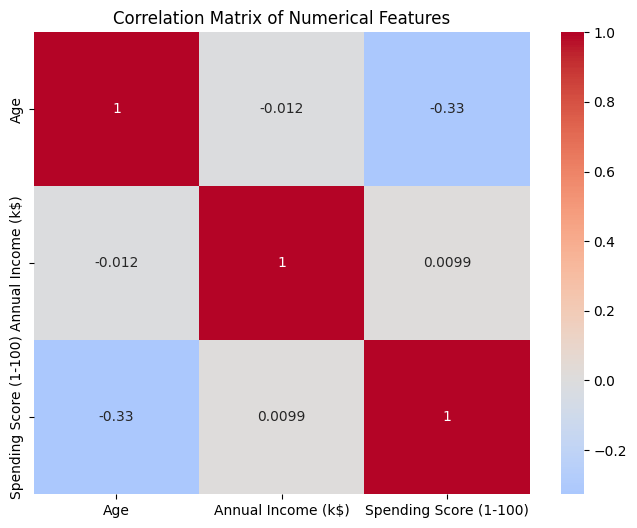

In [9]:
#Statistical Summary
print("="*50)
print("STATISTICAL SUMMARY")
print("="*50)

# Summary statistics for numerical columns
print("\nNumerical columns summary:")
print(df[numerical_cols].describe())

# Summary by gender
print("\nSummary by Gender:")
print(df.groupby('Genre')[numerical_cols].describe())

# Correlation matrix
print("\nCorrelation matrix:")
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

# Visualize correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [10]:
#Final Cleaned Dataset Summary
print("="*50)
print("FINAL CLEANED DATASET SUMMARY")
print("="*50)
print(f"Final dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Save the cleaned dataset
df.to_csv('Mall_Customers_Cleaned.csv', index=False)
print("\nCleaned dataset saved as 'Mall_Customers_Cleaned.csv'")

FINAL CLEANED DATASET SUMMARY
Final dataset shape: (200, 5)
Memory usage: 15.57 KB

Cleaned dataset saved as 'Mall_Customers_Cleaned.csv'


CUSTOMER SEGMENTATION ANALYSIS

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Load the cleaned dataset
df = pd.read_csv('Mall_Customers_Cleaned.csv')

# Display basic info
print("="*60)
print("CUSTOMER SEGMENTATION ANALYSIS")
print("="*60)
print(f"Dataset shape: {df.shape}")
print(f"Number of customers: {len(df)}")
print("\nFirst 5 rows:")
print(df.head())

CUSTOMER SEGMENTATION ANALYSIS
Dataset shape: (200, 5)
Number of customers: 200

First 5 rows:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


EDA

EXPLORATORY DATA ANALYSIS FOR SEGMENTATION
Dataset Shape: (200, 5)
Total Customers: 200

Basic Statistics:
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


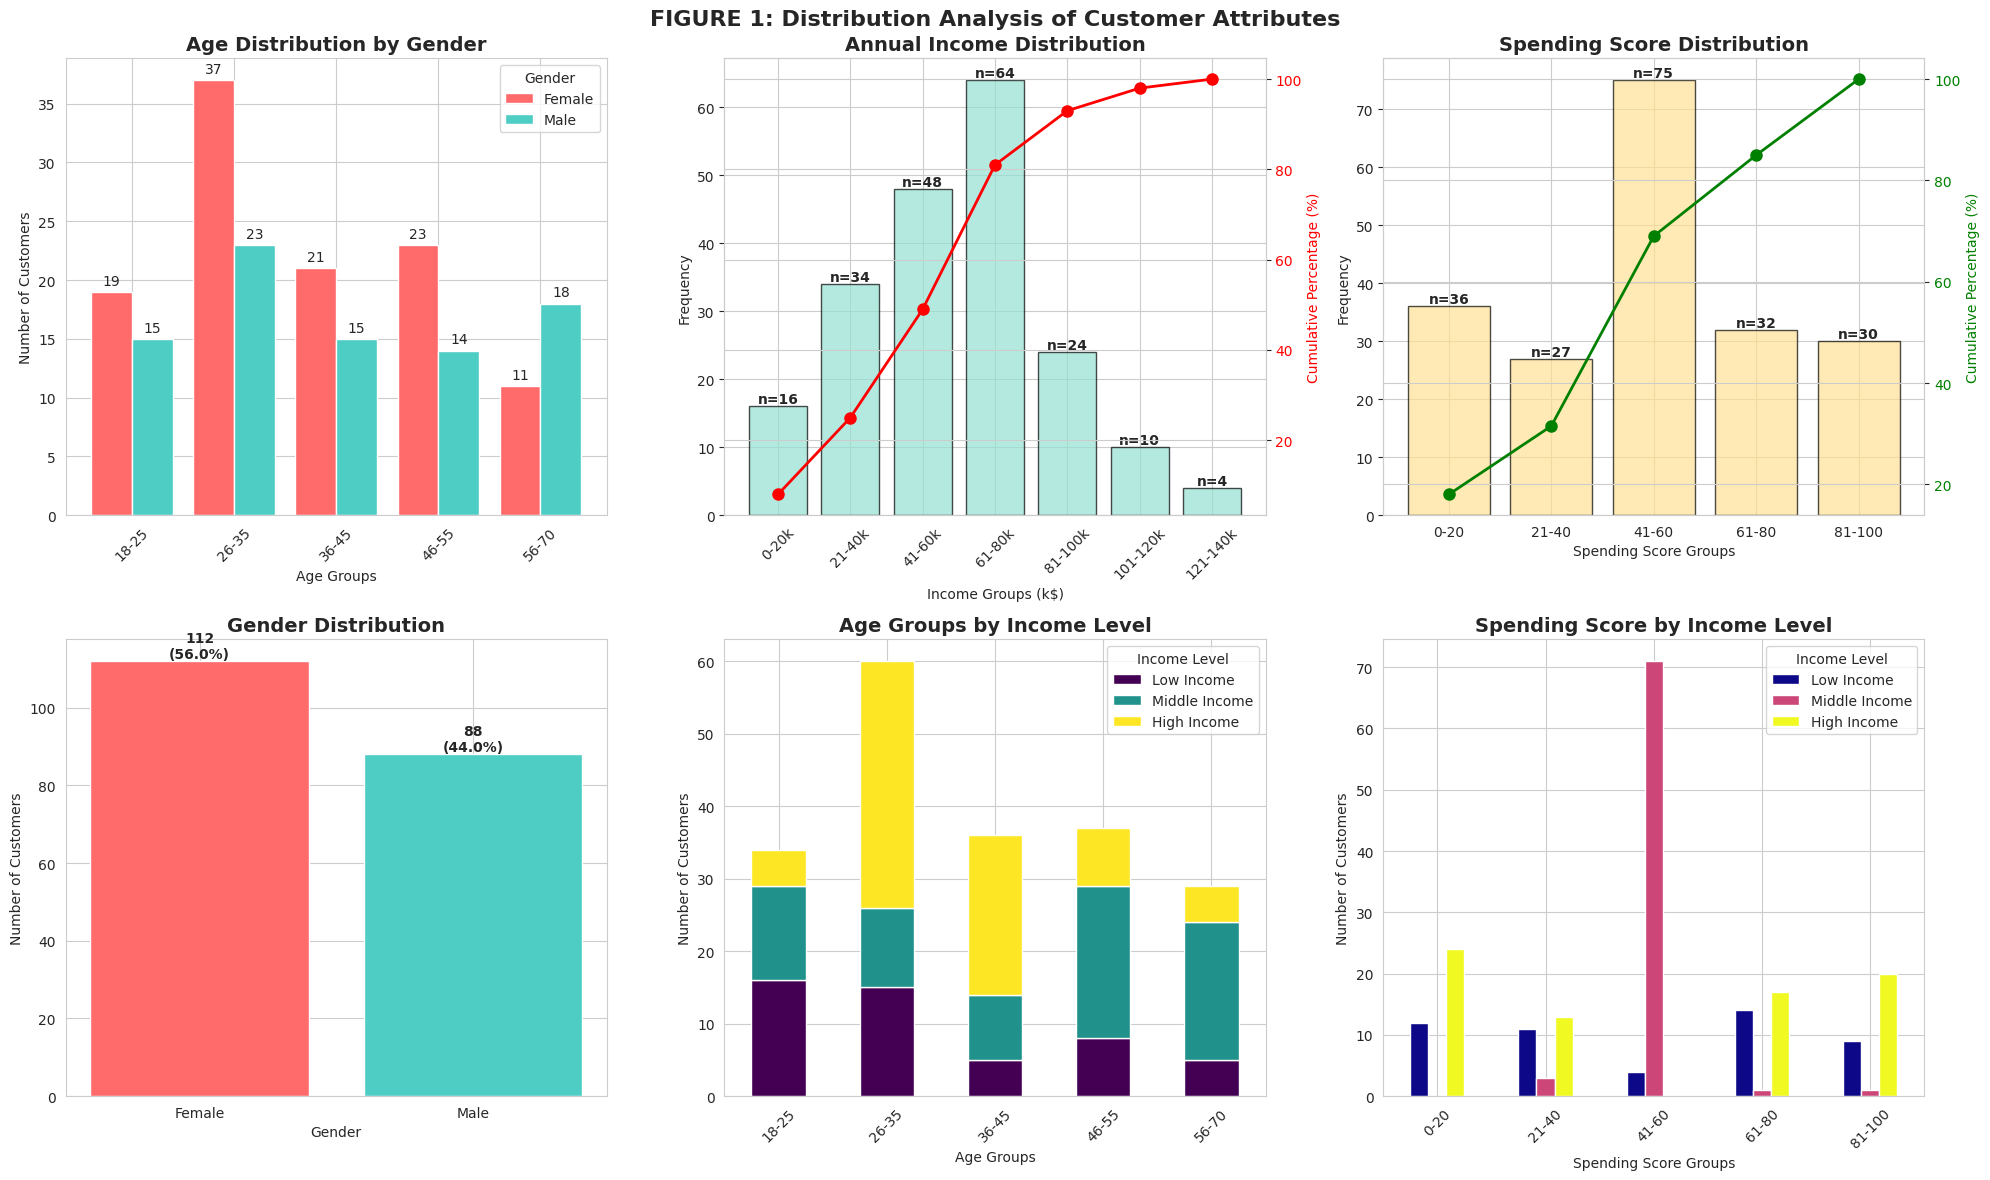

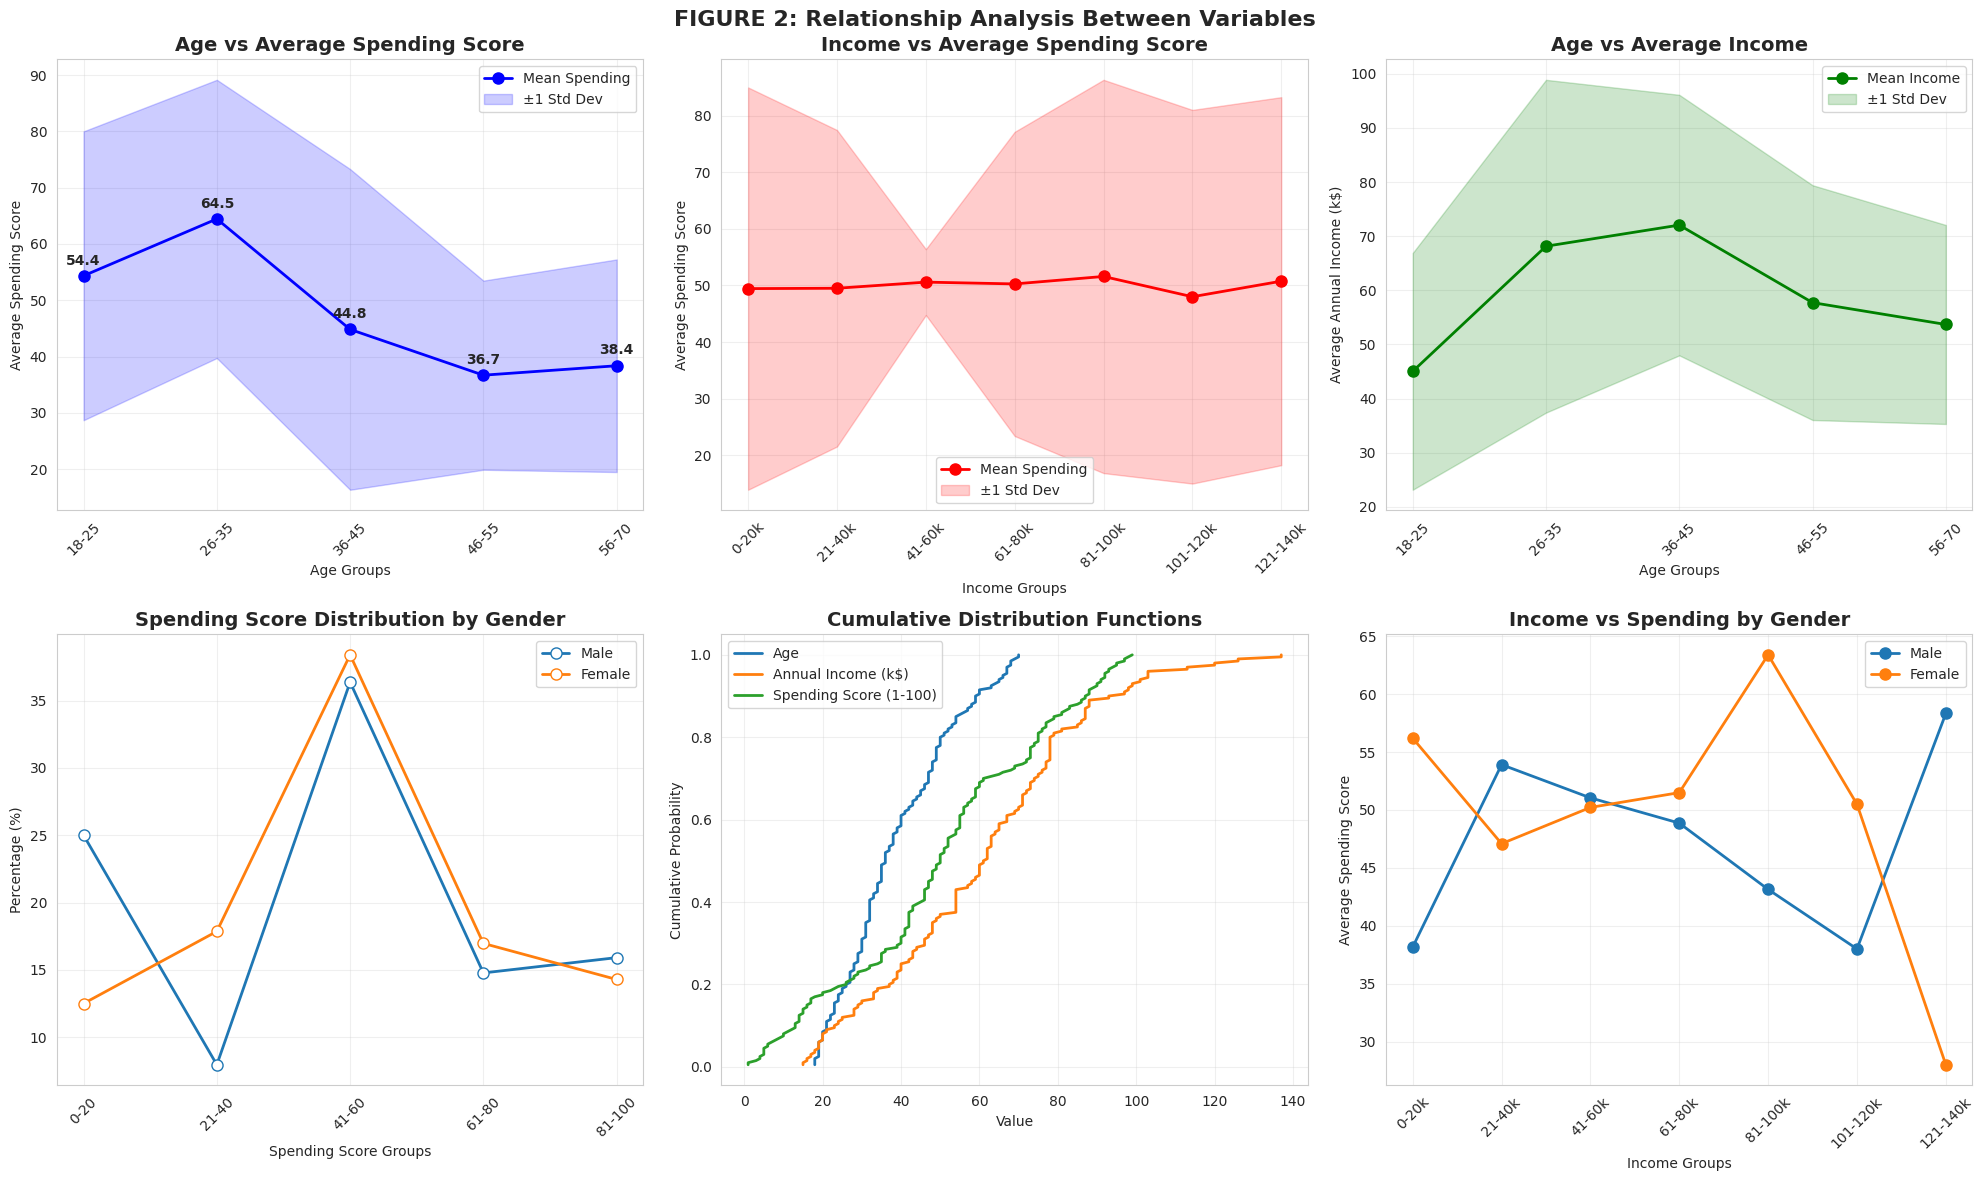

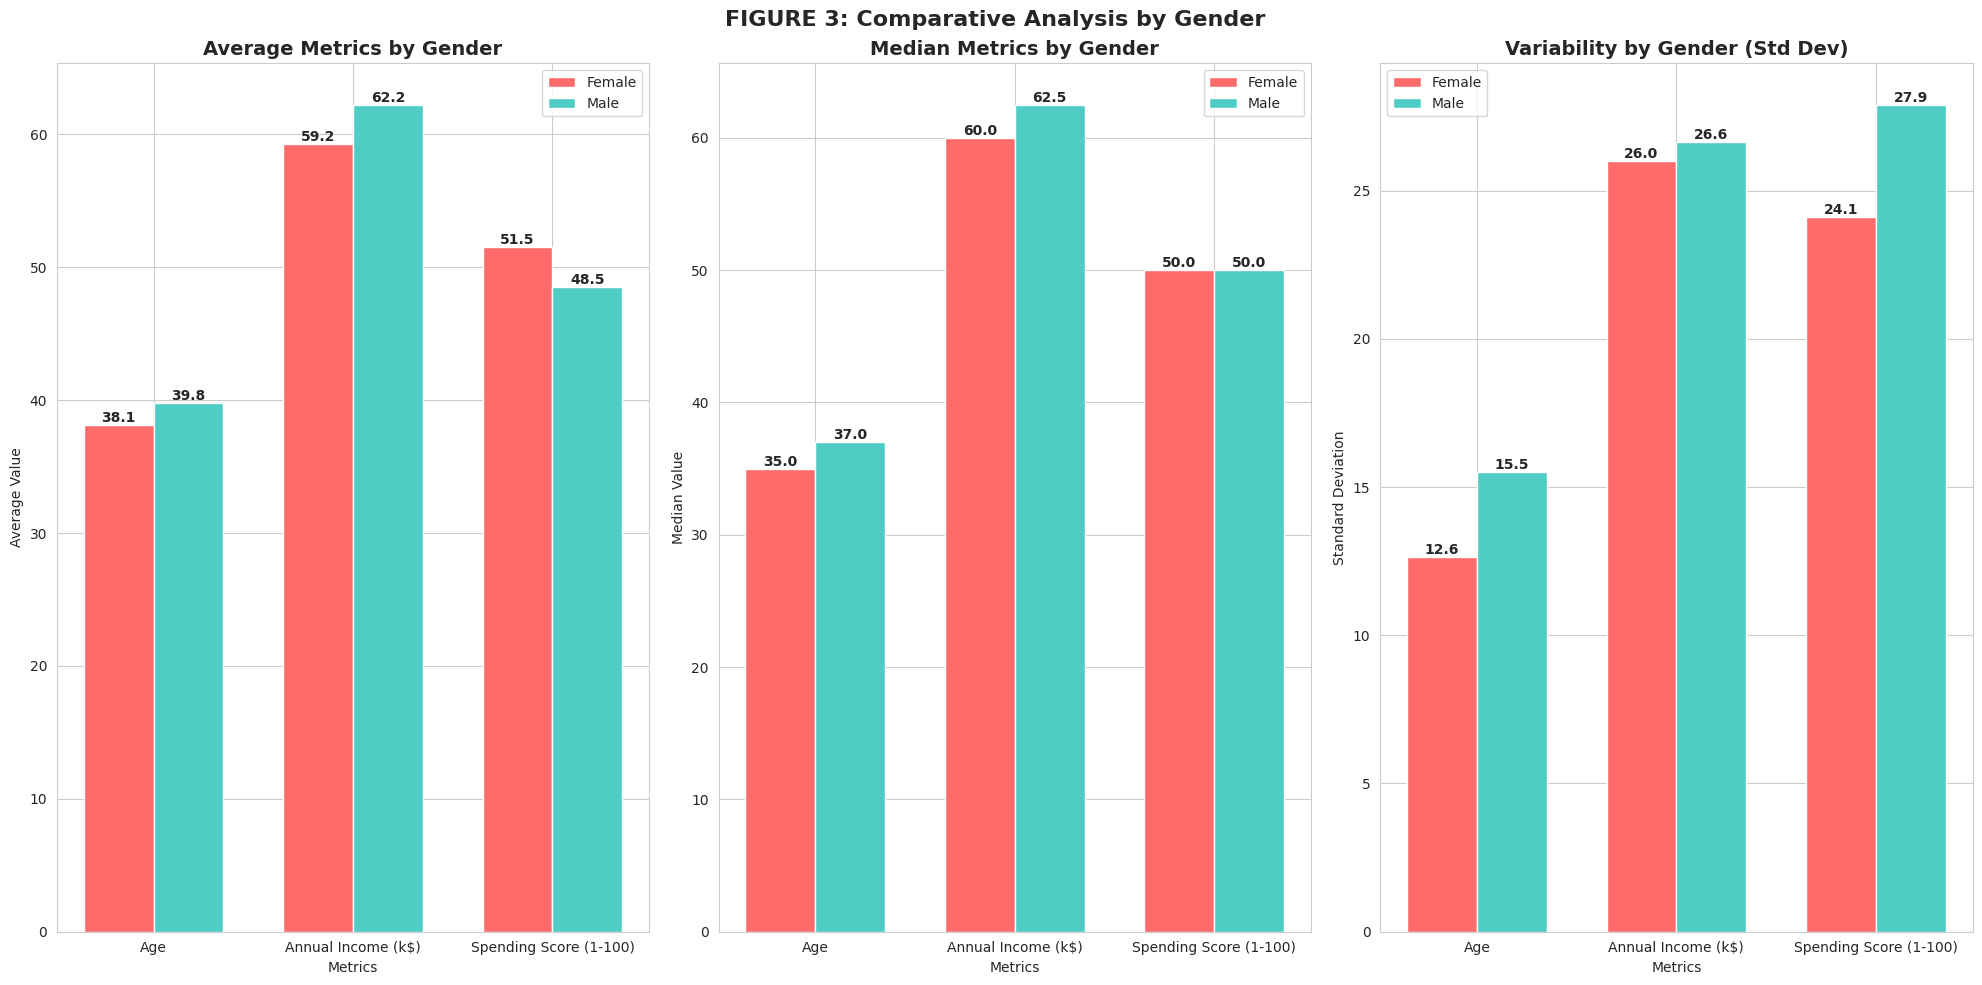

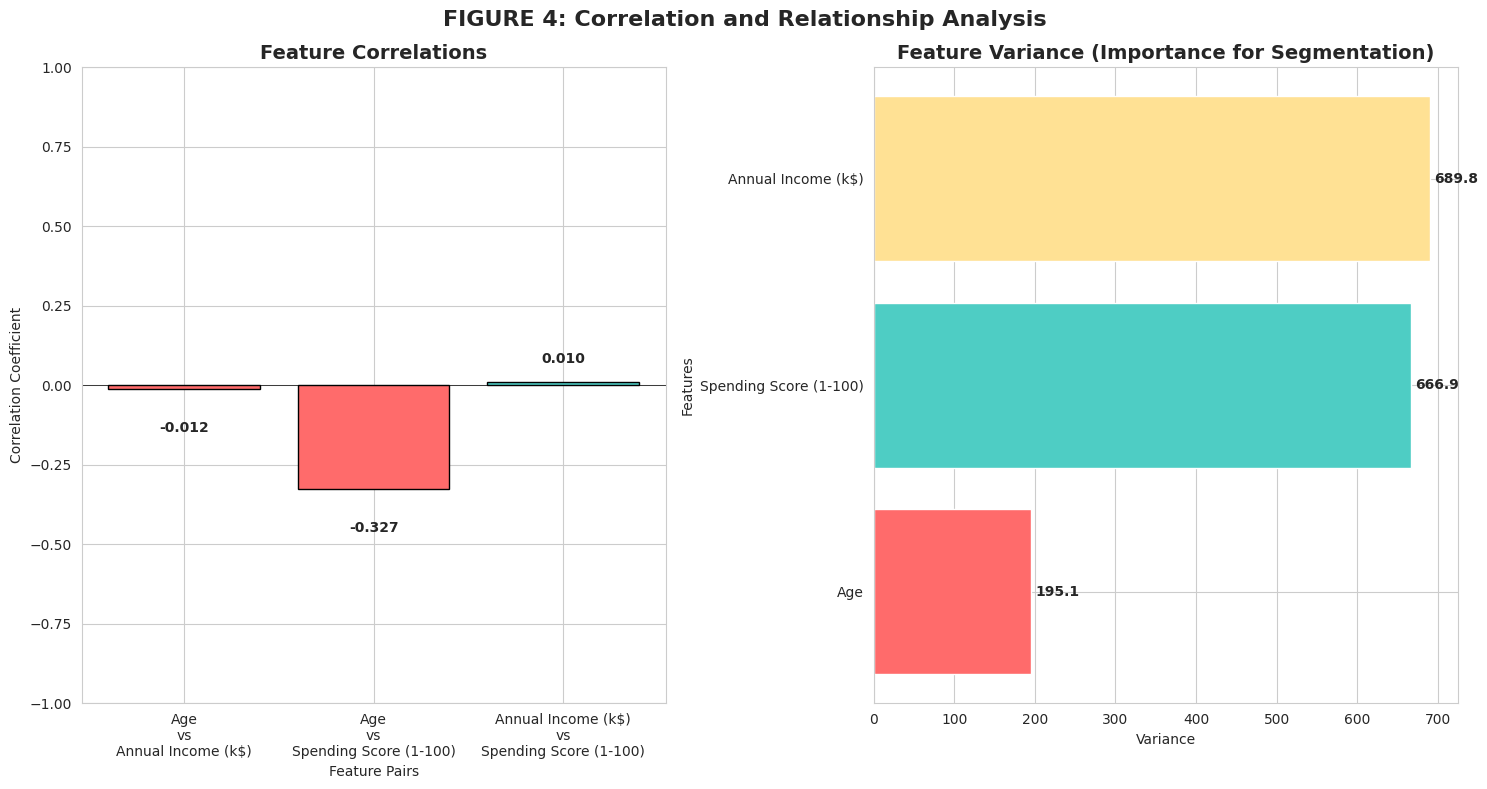

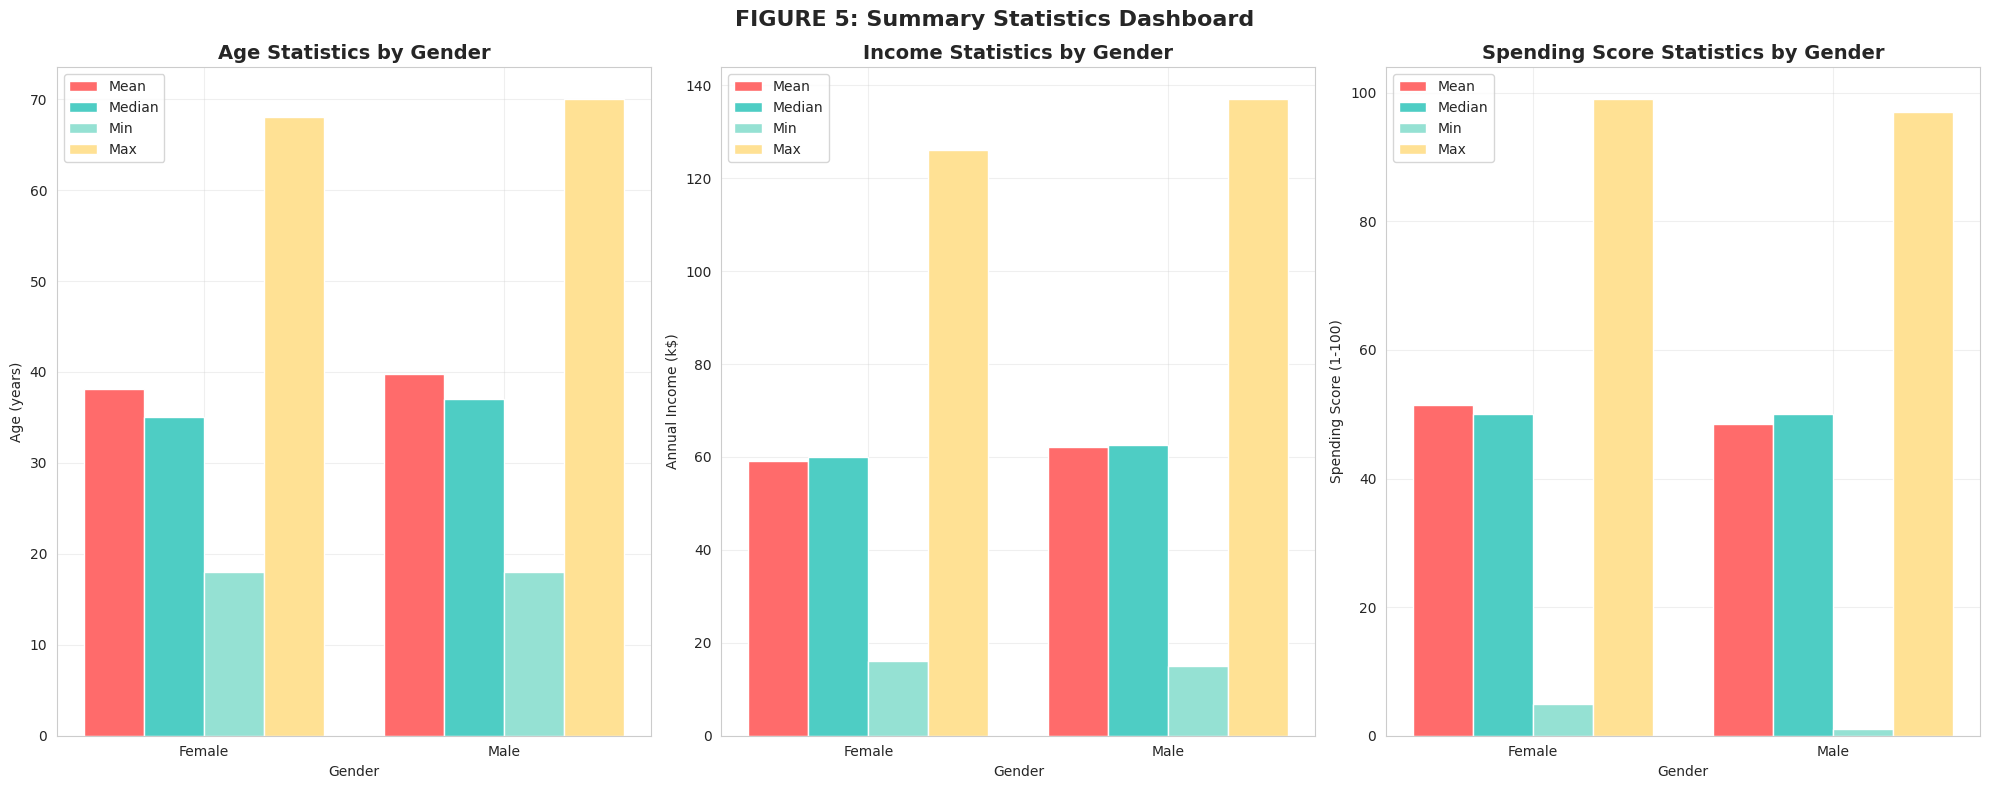


KEY FINDINGS FROM EDA

1. Demographics:
   - Total customers: 200
   - Female customers: 112 (56.0%)
   - Male customers: 88 (44.0%)

2. Age Distribution:
   - Average age: 38.9 years
   - Most common age group: 26-35
   - Age range: 18 to 70 years

3. Income Distribution:
   - Average income: $60.6k
   - Most common income group: 61-80k
   - Income range: $15k to $137k

4. Spending Behavior:
   - Average spending score: 50.2/100
   - Most common spending group: 41-60
   - Spending score range: 1 to 99

5. Key Correlations:
   - Age vs Annual Income (k$): -0.012
   - Age vs Spending Score (1-100): -0.327
   - Annual Income (k$) vs Spending Score (1-100): 0.010


In [13]:
#Exploratory Data Analysis for Segmentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Mall_Customers_Cleaned.csv')

print("="*60)
print("EXPLORATORY DATA ANALYSIS FOR SEGMENTATION")
print("="*60)
print(f"Dataset Shape: {df.shape}")
print(f"Total Customers: {len(df)}")
print("\nBasic Statistics:")
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe())

# Create age groups
age_bins = [18, 25, 35, 45, 55, 70]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-70']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Create income groups
income_bins = [0, 20, 40, 60, 80, 100, 120, 140]
income_labels = ['0-20k', '21-40k', '41-60k', '61-80k', '81-100k', '101-120k', '121-140k']
df['Income_Group'] = pd.cut(df['Annual Income (k$)'], bins=income_bins, labels=income_labels)

# Create spending groups
spending_bins = [0, 20, 40, 60, 80, 100]
spending_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['Spending_Group'] = pd.cut(df['Spending Score (1-100)'], bins=spending_bins, labels=spending_labels)

# Create income levels
df['Income_Level'] = pd.cut(df['Annual Income (k$)'],
                            bins=[0, 40, 70, 150],
                            labels=['Low Income', 'Middle Income', 'High Income'])

# ======================================================================
# FIGURE 1: Distribution Analysis using Bar Graphs
# ======================================================================
fig1 = plt.figure(figsize=(20, 12))
fig1.suptitle('FIGURE 1: Distribution Analysis of Customer Attributes', fontsize=16, fontweight='bold', y=0.98)

# 1.1 Age Distribution by Gender (Grouped Bar Graph)
ax1 = plt.subplot(2, 3, 1)
age_gender_dist = pd.crosstab(df['Age_Group'], df['Genre'])
age_gender_dist.plot(kind='bar', ax=ax1, color=['#FF6B6B', '#4ECDC4'], width=0.8)
ax1.set_title('Age Distribution by Gender', fontsize=14, fontweight='bold')
ax1.set_xlabel('Age Groups')
ax1.set_ylabel('Number of Customers')
ax1.legend(title='Gender')
ax1.tick_params(axis='x', rotation=45)
for container in ax1.containers:
    ax1.bar_label(container, padding=3)

# 1.2 Income Distribution (Line + Bar Graph)
ax2 = plt.subplot(2, 3, 2)
income_counts = df['Income_Group'].value_counts().sort_index()
bars = ax2.bar(income_counts.index, income_counts.values, color='#95E1D3', edgecolor='black', alpha=0.7)
ax2.set_title('Annual Income Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Income Groups (k$)')
ax2.set_ylabel('Frequency')
ax2.tick_params(axis='x', rotation=45)
ax2_twin = ax2.twinx()
cumulative_pct = np.cumsum(income_counts.values) / len(df) * 100
ax2_twin.plot(income_counts.index, cumulative_pct, 'ro-', linewidth=2, markersize=8, label='Cumulative %')
ax2_twin.set_ylabel('Cumulative Percentage (%)', color='red')
ax2_twin.tick_params(axis='y', labelcolor='red')
for bar, count in zip(bars, income_counts.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height, f'n={count}', ha='center', va='bottom', fontweight='bold')

# 1.3 Spending Score Distribution (Line + Bar Graph)
ax3 = plt.subplot(2, 3, 3)
spending_counts = df['Spending_Group'].value_counts().sort_index()
bars = ax3.bar(spending_counts.index, spending_counts.values, color='#FFE194', edgecolor='black', alpha=0.7)
ax3.set_title('Spending Score Distribution', fontsize=14, fontweight='bold')
ax3.set_xlabel('Spending Score Groups')
ax3.set_ylabel('Frequency')
ax3_twin = ax3.twinx()
cumulative_pct = np.cumsum(spending_counts.values) / len(df) * 100
ax3_twin.plot(spending_counts.index, cumulative_pct, 'go-', linewidth=2, markersize=8, label='Cumulative %')
ax3_twin.set_ylabel('Cumulative Percentage (%)', color='green')
ax3_twin.tick_params(axis='y', labelcolor='green')
for bar, count in zip(bars, spending_counts.values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height, f'n={count}', ha='center', va='bottom', fontweight='bold')

# 1.4 Gender Distribution (Bar Graph)
ax4 = plt.subplot(2, 3, 4)
gender_counts = df['Genre'].value_counts()
bars = ax4.bar(gender_counts.index, gender_counts.values, color=['#FF6B6B', '#4ECDC4'])
ax4.set_title('Gender Distribution', fontsize=14, fontweight='bold')
ax4.set_xlabel('Gender')
ax4.set_ylabel('Number of Customers')
for bar, count in zip(bars, gender_counts.values):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height, f'{count}\n({count/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

# 1.5 Age Groups by Income Level (Stacked Bar)
ax5 = plt.subplot(2, 3, 5)
age_income_cross = pd.crosstab(df['Age_Group'], df['Income_Level'])
age_income_cross.plot(kind='bar', stacked=True, ax=ax5, colormap='viridis')
ax5.set_title('Age Groups by Income Level', fontsize=14, fontweight='bold')
ax5.set_xlabel('Age Groups')
ax5.set_ylabel('Number of Customers')
ax5.legend(title='Income Level')
ax5.tick_params(axis='x', rotation=45)

# 1.6 Spending Score by Income Level (Grouped Bar)
ax6 = plt.subplot(2, 3, 6)
spending_income_cross = pd.crosstab(df['Spending_Group'], df['Income_Level'])
spending_income_cross.plot(kind='bar', ax=ax6, colormap='plasma')
ax6.set_title('Spending Score by Income Level', fontsize=14, fontweight='bold')
ax6.set_xlabel('Spending Score Groups')
ax6.set_ylabel('Number of Customers')
ax6.legend(title='Income Level')
ax6.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ======================================================================
# FIGURE 2: Relationship Analysis using Line Graphs
# ======================================================================
fig2 = plt.figure(figsize=(20, 12))
fig2.suptitle('FIGURE 2: Relationship Analysis Between Variables', fontsize=16, fontweight='bold', y=0.98)

# 2.1 Age vs Average Spending Score (Line Graph)
ax1 = plt.subplot(2, 3, 1)
age_spending = df.groupby('Age_Group')['Spending Score (1-100)'].agg(['mean', 'std']).reset_index()
ax1.plot(age_spending['Age_Group'], age_spending['mean'], 'bo-', linewidth=2, markersize=8, label='Mean Spending')
ax1.fill_between(age_spending['Age_Group'],
                 age_spending['mean'] - age_spending['std'],
                 age_spending['mean'] + age_spending['std'],
                 alpha=0.2, color='blue', label='±1 Std Dev')
ax1.set_title('Age vs Average Spending Score', fontsize=14, fontweight='bold')
ax1.set_xlabel('Age Groups')
ax1.set_ylabel('Average Spending Score')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)
for i, (_, row) in enumerate(age_spending.iterrows()):
    ax1.text(i, row['mean'] + 2, f'{row["mean"]:.1f}', ha='center', fontweight='bold')

# 2.2 Income vs Average Spending Score (Line Graph)
ax2 = plt.subplot(2, 3, 2)
income_spending = df.groupby('Income_Group')['Spending Score (1-100)'].agg(['mean', 'std']).reset_index()
ax2.plot(range(len(income_spending)), income_spending['mean'], 'ro-', linewidth=2, markersize=8, label='Mean Spending')
ax2.fill_between(range(len(income_spending)),
                 income_spending['mean'] - income_spending['std'],
                 income_spending['mean'] + income_spending['std'],
                 alpha=0.2, color='red', label='±1 Std Dev')
ax2.set_title('Income vs Average Spending Score', fontsize=14, fontweight='bold')
ax2.set_xlabel('Income Groups')
ax2.set_ylabel('Average Spending Score')
ax2.set_xticks(range(len(income_spending)))
ax2.set_xticklabels(income_spending['Income_Group'], rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 2.3 Age vs Average Income (Line Graph)
ax3 = plt.subplot(2, 3, 3)
age_income = df.groupby('Age_Group')['Annual Income (k$)'].agg(['mean', 'std']).reset_index()
ax3.plot(age_income['Age_Group'], age_income['mean'], 'go-', linewidth=2, markersize=8, label='Mean Income')
ax3.fill_between(age_income['Age_Group'],
                 age_income['mean'] - age_income['std'],
                 age_income['mean'] + age_income['std'],
                 alpha=0.2, color='green', label='±1 Std Dev')
ax3.set_title('Age vs Average Income', fontsize=14, fontweight='bold')
ax3.set_xlabel('Age Groups')
ax3.set_ylabel('Average Annual Income (k$)')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

# 2.4 Spending Score Distribution by Gender (Line Graph)
ax4 = plt.subplot(2, 3, 4)
for gender in ['Male', 'Female']:
    gender_data = df[df['Genre'] == gender]
    spending_dist = gender_data['Spending_Group'].value_counts().sort_index()
    spending_pct = spending_dist / len(gender_data) * 100
    ax4.plot(spending_pct.index, spending_pct.values, 'o-', linewidth=2, markersize=8,
             label=gender, markerfacecolor='white')
ax4.set_title('Spending Score Distribution by Gender', fontsize=14, fontweight='bold')
ax4.set_xlabel('Spending Score Groups')
ax4.set_ylabel('Percentage (%)')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

# 2.5 Cumulative Distribution Functions (Line Graph)
ax5 = plt.subplot(2, 3, 5)
for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    sorted_data = np.sort(df[col])
    yvals = np.arange(1, len(sorted_data)+1) / len(sorted_data)
    ax5.plot(sorted_data, yvals, linewidth=2, label=col)
ax5.set_title('Cumulative Distribution Functions', fontsize=14, fontweight='bold')
ax5.set_xlabel('Value')
ax5.set_ylabel('Cumulative Probability')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 2.6 Gender-wise Spending Pattern (Line Graph)
ax6 = plt.subplot(2, 3, 6)
for gender in ['Male', 'Female']:
    gender_data = df[df['Genre'] == gender]
    gender_income_spending = gender_data.groupby('Income_Group')['Spending Score (1-100)'].mean()
    ax6.plot(range(len(gender_income_spending)), gender_income_spending.values,
             'o-', linewidth=2, markersize=8, label=gender)
ax6.set_title('Income vs Spending by Gender', fontsize=14, fontweight='bold')
ax6.set_xlabel('Income Groups')
ax6.set_ylabel('Average Spending Score')
ax6.set_xticks(range(len(gender_income_spending)))
ax6.set_xticklabels(gender_income_spending.index, rotation=45)
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ======================================================================
# FIGURE 3: Comparative Analysis using Bar Graphs
# ======================================================================
fig3 = plt.figure(figsize=(20, 10))
fig3.suptitle('FIGURE 3: Comparative Analysis by Gender', fontsize=16, fontweight='bold', y=0.98)

# 3.1 Average Metrics by Gender (Grouped Bar)
ax1 = plt.subplot(1, 3, 1)
metrics = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
female_means = [df[df['Genre'] == 'Female'][m].mean() for m in metrics]
male_means = [df[df['Genre'] == 'Male'][m].mean() for m in metrics]
x = np.arange(len(metrics))
width = 0.35
bars1 = ax1.bar(x - width/2, female_means, width, label='Female', color='#FF6B6B')
bars2 = ax1.bar(x + width/2, male_means, width, label='Male', color='#4ECDC4')
ax1.set_title('Average Metrics by Gender', fontsize=14, fontweight='bold')
ax1.set_xlabel('Metrics')
ax1.set_ylabel('Average Value')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics)
ax1.legend()
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}',
                 ha='center', va='bottom', fontweight='bold')

# 3.2 Median Metrics by Gender (Grouped Bar)
ax2 = plt.subplot(1, 3, 2)
female_medians = [df[df['Genre'] == 'Female'][m].median() for m in metrics]
male_medians = [df[df['Genre'] == 'Male'][m].median() for m in metrics]
bars1 = ax2.bar(x - width/2, female_medians, width, label='Female', color='#FF6B6B')
bars2 = ax2.bar(x + width/2, male_medians, width, label='Male', color='#4ECDC4')
ax2.set_title('Median Metrics by Gender', fontsize=14, fontweight='bold')
ax2.set_xlabel('Metrics')
ax2.set_ylabel('Median Value')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics)
ax2.legend()
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}',
                 ha='center', va='bottom', fontweight='bold')

# 3.3 Standard Deviation by Gender (Grouped Bar)
ax3 = plt.subplot(1, 3, 3)
female_std = [df[df['Genre'] == 'Female'][m].std() for m in metrics]
male_std = [df[df['Genre'] == 'Male'][m].std() for m in metrics]
bars1 = ax3.bar(x - width/2, female_std, width, label='Female', color='#FF6B6B')
bars2 = ax3.bar(x + width/2, male_std, width, label='Male', color='#4ECDC4')
ax3.set_title('Variability by Gender (Std Dev)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Metrics')
ax3.set_ylabel('Standard Deviation')
ax3.set_xticks(x)
ax3.set_xticklabels(metrics)
ax3.legend()
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}',
                 ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ======================================================================
# FIGURE 4: Correlation Analysis using Bar Graphs
# ======================================================================
fig4 = plt.figure(figsize=(15, 8))
fig4.suptitle('FIGURE 4: Correlation and Relationship Analysis', fontsize=16, fontweight='bold', y=0.98)

# 4.1 Correlation Matrix as Bar Graph
ax1 = plt.subplot(1, 2, 1)
corr_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append({
            'Pair': f"{corr_matrix.columns[i]}\nvs\n{corr_matrix.columns[j]}",
            'Correlation': corr_matrix.iloc[i, j]
        })
corr_df = pd.DataFrame(corr_pairs)
colors = ['#FF6B6B' if x < 0 else '#4ECDC4' for x in corr_df['Correlation']]
bars = ax1.bar(corr_df['Pair'], corr_df['Correlation'], color=colors, edgecolor='black', linewidth=1)
ax1.set_title('Feature Correlations', fontsize=14, fontweight='bold')
ax1.set_xlabel('Feature Pairs')
ax1.set_ylabel('Correlation Coefficient')
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax1.set_ylim(-1, 1)
for bar, val in zip(bars, corr_df['Correlation']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + (0.05 if val >= 0 else -0.1),
             f'{val:.3f}', ha='center', va='bottom' if val >= 0 else 'top', fontweight='bold')

# 4.2 Feature Importance for Segmentation (Bar Graph)
ax2 = plt.subplot(1, 2, 2)
variances = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].var()
variance_df = variances.reset_index()
variance_df.columns = ['Feature', 'Variance']
variance_df = variance_df.sort_values('Variance', ascending=True)
bars = ax2.barh(variance_df['Feature'], variance_df['Variance'], color=['#FF6B6B', '#4ECDC4', '#FFE194'])
ax2.set_title('Feature Variance (Importance for Segmentation)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Variance')
ax2.set_ylabel('Features')
for bar, val in zip(bars, variance_df['Variance']):
    width = bar.get_width()
    ax2.text(width + 5, bar.get_y() + bar.get_height()/2., f'{val:.1f}',
             ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# ======================================================================
# FIGURE 5: Summary Statistics Dashboard
# ======================================================================
fig5 = plt.figure(figsize=(20, 8))
fig5.suptitle('FIGURE 5: Summary Statistics Dashboard', fontsize=16, fontweight='bold', y=0.98)

# 5.1 Age Statistics by Gender (Bar Graph)
ax1 = plt.subplot(1, 3, 1)
age_stats = df.groupby('Genre')['Age'].agg(['mean', 'median', 'min', 'max']).round(1)
x = np.arange(len(age_stats.index))
width = 0.2
ax1.bar(x - 1.5*width, age_stats['mean'], width, label='Mean', color='#FF6B6B')
ax1.bar(x - 0.5*width, age_stats['median'], width, label='Median', color='#4ECDC4')
ax1.bar(x + 0.5*width, age_stats['min'], width, label='Min', color='#95E1D3')
ax1.bar(x + 1.5*width, age_stats['max'], width, label='Max', color='#FFE194')
ax1.set_title('Age Statistics by Gender', fontsize=14, fontweight='bold')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Age (years)')
ax1.set_xticks(x)
ax1.set_xticklabels(age_stats.index)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 5.2 Income Statistics by Gender (Bar Graph)
ax2 = plt.subplot(1, 3, 2)
income_stats = df.groupby('Genre')['Annual Income (k$)'].agg(['mean', 'median', 'min', 'max']).round(1)
ax2.bar(x - 1.5*width, income_stats['mean'], width, label='Mean', color='#FF6B6B')
ax2.bar(x - 0.5*width, income_stats['median'], width, label='Median', color='#4ECDC4')
ax2.bar(x + 0.5*width, income_stats['min'], width, label='Min', color='#95E1D3')
ax2.bar(x + 1.5*width, income_stats['max'], width, label='Max', color='#FFE194')
ax2.set_title('Income Statistics by Gender', fontsize=14, fontweight='bold')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Annual Income (k$)')
ax2.set_xticks(x)
ax2.set_xticklabels(income_stats.index)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 5.3 Spending Score Statistics by Gender (Bar Graph)
ax3 = plt.subplot(1, 3, 3)
spending_stats = df.groupby('Genre')['Spending Score (1-100)'].agg(['mean', 'median', 'min', 'max']).round(1)
ax3.bar(x - 1.5*width, spending_stats['mean'], width, label='Mean', color='#FF6B6B')
ax3.bar(x - 0.5*width, spending_stats['median'], width, label='Median', color='#4ECDC4')
ax3.bar(x + 0.5*width, spending_stats['min'], width, label='Min', color='#95E1D3')
ax3.bar(x + 1.5*width, spending_stats['max'], width, label='Max', color='#FFE194')
ax3.set_title('Spending Score Statistics by Gender', fontsize=14, fontweight='bold')
ax3.set_xlabel('Gender')
ax3.set_ylabel('Spending Score (1-100)')
ax3.set_xticks(x)
ax3.set_xticklabels(spending_stats.index)
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ======================================================================
# KEY FINDINGS
# ======================================================================
print("\n" + "="*60)
print("KEY FINDINGS FROM EDA")
print("="*60)
print("\n1. Demographics:")
print(f"   - Total customers: {len(df)}")
print(f"   - Female customers: {len(df[df['Genre']=='Female'])} ({len(df[df['Genre']=='Female'])/len(df)*100:.1f}%)")
print(f"   - Male customers: {len(df[df['Genre']=='Male'])} ({len(df[df['Genre']=='Male'])/len(df)*100:.1f}%)")

print("\n2. Age Distribution:")
print(f"   - Average age: {df['Age'].mean():.1f} years")
print(f"   - Most common age group: {df['Age_Group'].mode()[0]}")
print(f"   - Age range: {df['Age'].min()} to {df['Age'].max()} years")

print("\n3. Income Distribution:")
print(f"   - Average income: ${df['Annual Income (k$)'].mean():.1f}k")
print(f"   - Most common income group: {df['Income_Group'].mode()[0]}")
print(f"   - Income range: ${df['Annual Income (k$)'].min()}k to ${df['Annual Income (k$)'].max()}k")

print("\n4. Spending Behavior:")
print(f"   - Average spending score: {df['Spending Score (1-100)'].mean():.1f}/100")
print(f"   - Most common spending group: {df['Spending_Group'].mode()[0]}")
print(f"   - Spending score range: {df['Spending Score (1-100)'].min()} to {df['Spending Score (1-100)'].max()}")

print("\n5. Key Correlations:")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        print(f"   - {corr_matrix.columns[i]} vs {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")

In [14]:
#Data Preparation for Clustering
print("="*60)
print("DATA PREPARATION FOR CLUSTERING")
print("="*60)

# Select features for clustering
# We'll create different feature sets for different segmentation strategies

# Feature Set 1: All numerical features
features_1 = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X_1 = df[features_1].copy()

# Feature Set 2: Income and Spending Score (for mall-specific segmentation)
features_2 = ['Annual Income (k$)', 'Spending Score (1-100)']
X_2 = df[features_2].copy()

# Feature Set 3: All features including encoded Gender
le = LabelEncoder()
df['Gender_Encoded'] = le.fit_transform(df['Genre'])  # Male: 1, Female: 0
features_3 = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Encoded']
X_3 = df[features_3].copy()

# Standardize the features
scaler_1 = StandardScaler()
scaler_2 = StandardScaler()
scaler_3 = StandardScaler()

X_1_scaled = scaler_1.fit_transform(X_1)
X_2_scaled = scaler_2.fit_transform(X_2)
X_3_scaled = scaler_3.fit_transform(X_3)

print("Feature sets created:")
print(f"Set 1: {features_1} (scaled)")
print(f"Set 2: {features_2} (scaled)")
print(f"Set 3: {features_3} (scaled)")

DATA PREPARATION FOR CLUSTERING
Feature sets created:
Set 1: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'] (scaled)
Set 2: ['Annual Income (k$)', 'Spending Score (1-100)'] (scaled)
Set 3: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Encoded'] (scaled)


FINDING OPTIMAL NUMBER OF CLUSTERS


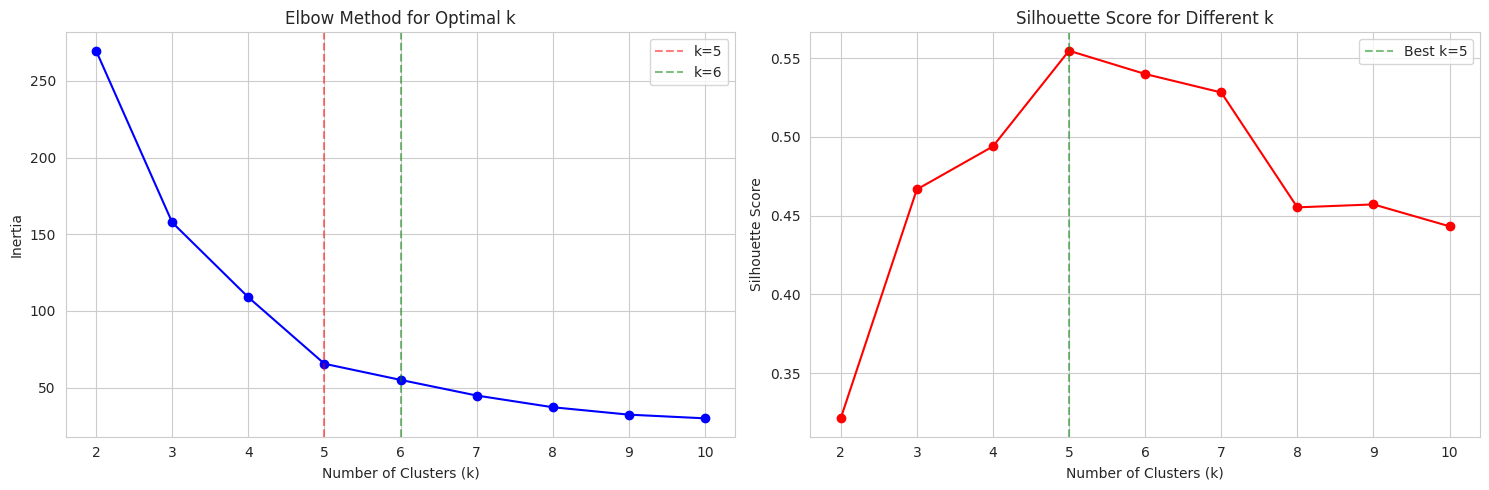

Best silhouette score achieved at k = 5 with score = 0.555


In [16]:
#Finding Optimal Number of Clusters (Elbow Method & Silhouette Analysis)
print("="*60)
print("FINDING OPTIMAL NUMBER OF CLUSTERS")
print("="*60)

# Using Feature Set 2 (Income and Spending Score) as it's most relevant for mall segmentation

# Elbow Method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_2_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_2_scaled, kmeans.labels_))

# Plot Elbow curve and Silhouette scores
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Elbow curve
axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method for Optimal k')
axes[0].grid(True)

# Add vertical line at potential elbow points
axes[0].axvline(x=5, color='r', linestyle='--', alpha=0.5, label='k=5')
axes[0].axvline(x=6, color='g', linestyle='--', alpha=0.5, label='k=6')
axes[0].legend()

# Silhouette scores
axes[1].plot(K_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score for Different k')
axes[1].grid(True)

# Highlight best silhouette score
best_k = K_range[np.argmax(silhouette_scores)]
axes[1].axvline(x=best_k, color='g', linestyle='--', alpha=0.5, label=f'Best k={best_k}')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"Best silhouette score achieved at k = {best_k} with score = {max(silhouette_scores):.3f}")